In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read data
patent = pd.read_csv('../Data/Grant_data/patent_2023.csv')
patent_r = pd.read_csv('../Data/Grant_data/patent_2023_r.csv')

In [4]:
patent.head(1)

,application_num,publication_num,publication_time,title,applicant_name,applicant_org,assignee_org,ass_city,ass_state,ass_country,abstract,created_at,updated_at
0,29769808,D0973999,20230103,Churro-shaped pet treat,,"Spectrum Brands, Inc.","Spectrum Brands, Inc.",Middleton,WI,US,NaN,2024-09-10 21:05:49,2024-09-10 21:05:49


In [5]:
patent_r.head(1)

,application_num,publication_num,reference,created_at,updated_at
0,15321099,10507909,"{2716460,3077934,6168379,7594796,8191826,84189...",2024-09-23 22:19:25,2024-09-23 22:19:25


In [6]:
# Data preprocessing

In [7]:
# Convert all string data in the data to lowercase
a = 0
for col in patent.columns:
    a = a+1
    if a >= 4:
        if patent[col].dtype == 'object':
            # Convert all values of the column to lowercase
            patent[col] = patent[col].str.lower()

In [8]:
# Duplicate removal
patent = patent.drop_duplicates()
# Reset index
patent = patent.reset_index(drop=True)

In [9]:
# Remove useless columns
patent.drop(['created_at','updated_at'], axis=1, inplace=True)
patent_r.drop(['created_at','updated_at'], axis=1, inplace=True)

In [10]:
# Merge two tables
patent.drop(columns=['publication_num'], inplace=True)
patent = pd.merge(patent, patent_r, on='application_num')

In [11]:
# Delete patents with missing abstracts
patent = patent.dropna(subset=['abstract'])
# Reset index
patent = patent.reset_index(drop=True) 

In [27]:
patent.to_csv('../Data/Grant_data/grant_data.csv')

In [14]:
# Data analysis

In [13]:
# Count the number of patents in each country
country_counts = patent['ass_country'].value_counts()
print('The number of countries to which the patent belongs is:',len(country_counts))

The number of countries to which the patent belongs is: 109


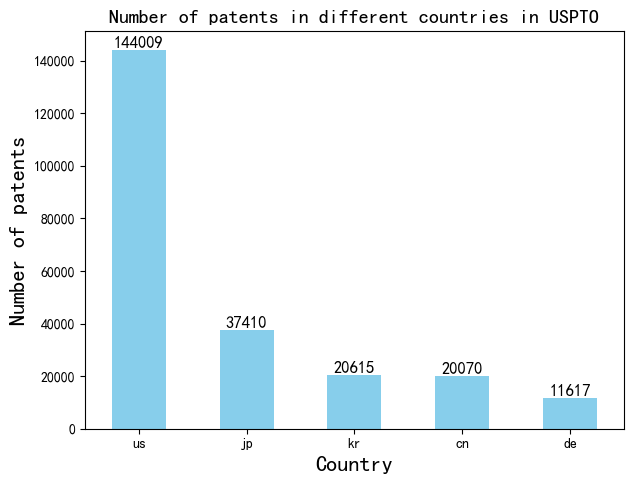

In [25]:
# Sort county_counties in descending order by value and select the top 5
top_countries = country_counts.sort_values(ascending=False)[:5]

plt.rcParams['axes.unicode_minus'] = False  # Display negative sign normally
# Set global font size
plt.rcParams['font.size'] = 12  # Default Font Size
plt.rcParams['axes.labelsize'] = 16  # Axis label font size
plt.rcParams['xtick.labelsize'] = 10  # Font size of x-axis scale
plt.rcParams['ytick.labelsize'] = 10  # Font size of y-axis scale
plt.rcParams['legend.fontsize'] = 10  # Legend font size
plt.rcParams['figure.titlesize'] = 15  # Chart Title Font Size

# Draw a bar chart using matplotlib
plt.figure(figsize=(6.5, 5))
bar_plot = top_countries.plot(kind='bar', color='skyblue')
plt.title('Number of patents in different countries in USPTO')
plt.xlabel('Country')
plt.ylabel('Number of patents')
plt.xticks(rotation=0)  # Maintain label level
plt.tight_layout()  # Automatically adjust subgraph parameters to fill the entire image area

# Add numerical values to the column
bar_plot.bar_label(bar_plot.containers[0])

# Display graphics
plt.show()

In [21]:
# Count the number of patents held by each patent holder
applicant_counts = patent['assignee_org'].value_counts()
print('The number of patent holders is:',len(applicant_counts))

The number of patent holders is: 53495


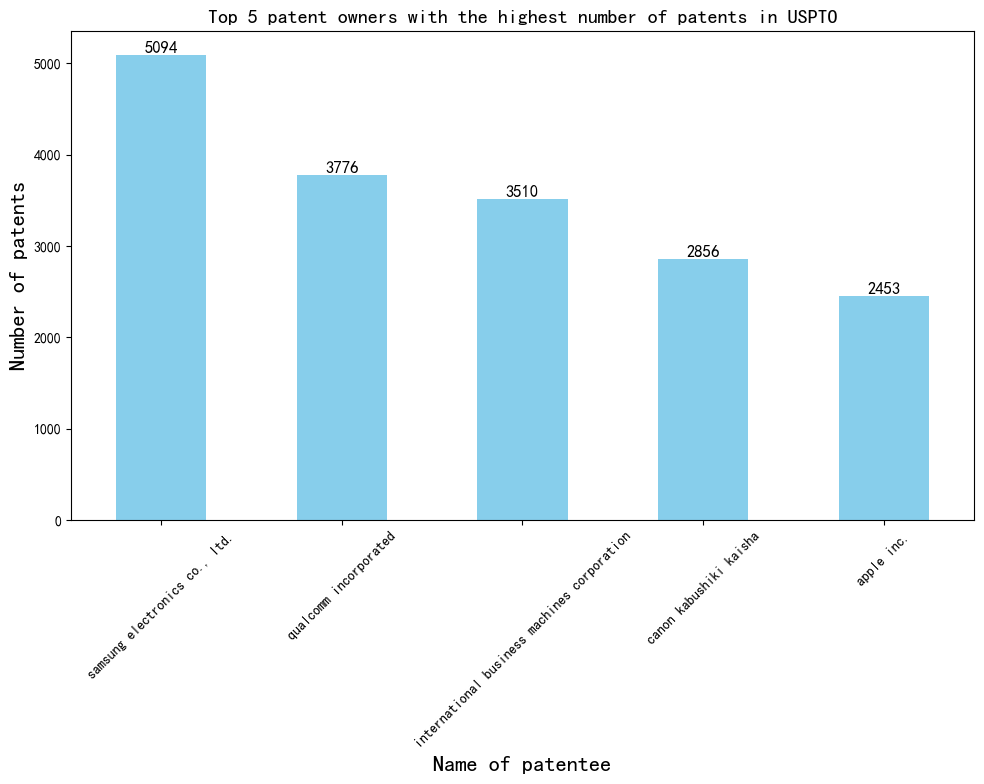

In [24]:
# Sort applicant_comunts in descending order by value and select the top 5
top_countries = applicant_counts.sort_values(ascending=False)[:5]

# Set matplotlib to display Chinese using SimHei font
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False  # Display negative sign normally
# Set global font size
plt.rcParams['font.size'] = 12  # Default Font Size
plt.rcParams['axes.labelsize'] = 16  # Axis label font size
plt.rcParams['xtick.labelsize'] = 10  # Font size of x-axis scale
plt.rcParams['ytick.labelsize'] = 10  # Font size of y-axis scale
plt.rcParams['legend.fontsize'] = 10  # Legend font size
plt.rcParams['figure.titlesize'] = 15  # Chart Title Font Size

# Draw a bar chart using matplotlib
plt.figure(figsize=(10, 8))
bar_plot = top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 5 patent owners with the highest number of patents in USPTO')
plt.xlabel('Name of patentee')
plt.ylabel('Number of patents')
plt.xticks(rotation=0)  # Maintain label level
plt.tight_layout()  # Automatically adjust subgraph parameters to fill the entire image area

# Modify the tilt angle of the x-axis label
plt.xticks(rotation=45)

# Adjust the layout to accommodate tilted labels
plt.tight_layout()

# Add numerical values to the column
bar_plot.bar_label(bar_plot.containers[0])

# Display graphics
plt.show()

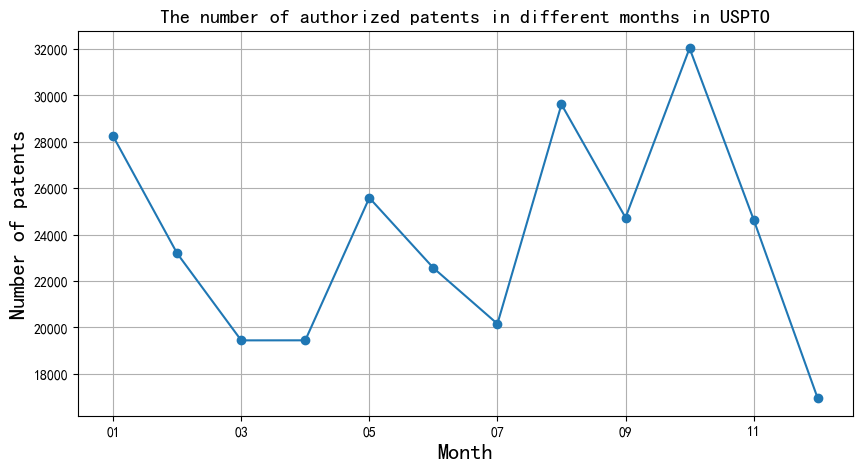

In [26]:
# Count the number of patents in each month
patent1 = patent.copy()
# Extract the month and format it
patent1['month'] = patent1['publication_time'].apply(lambda x: str(x)[4:6])
# Calculate the number of patents for each month
monthly_counts = patent1['month'].value_counts().sort_index()

# Draw a line chart
plt.figure(figsize=(10, 5))
monthly_counts.plot(kind='line', marker='o')
plt.title('The number of authorized patents in different months in USPTO')
plt.xlabel('Month')
plt.ylabel('Number of patents')
plt.grid(True)
plt.show()